In [1]:
import os
os.environ["LOGURU_LEVEL"] = "ERROR"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dsc2024 import datasets
from dsc2024 import handling
from dsc2024 import features

# Data Handling

In [3]:
real_test = False

In [4]:
%%time
datasets.dataset_default = "public_f2.csv"
datasets.vector_images_filepath = "images_cropped_full_samples_2000km.pkl.xz"

df = datasets.get_train_dataset()

Dataset public_f2.csv has shape (302399, 12) with images imported from images_cropped_full_samples_2000km.pkl.xz and converted to vectors
Reading from C:\Projetos\dsc2024\datasets\images_cropped_full_samples_2000km.pkl.xz
CPU times: total: 3min 16s
Wall time: 3min 15s


In [5]:
df.shape

(211679, 74)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 74 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt_dep                         211679 non-null  object        
 1   dt_arr                         211679 non-null  object        
 2   hora_ref                       211679 non-null  datetime64[ns]
 3   origem                         211679 non-null  object        
 4   destino                        211679 non-null  object        
 5   url_img_satelite               208741 non-null  object        
 6   prev_troca_cabeceira           211679 non-null  int64         
 7   troca_cabeceira_hora_anterior  211679 non-null  int64         
 8   espera                         211679 non-null  float64       
 9   destino_altitude               211679 non-null  int64         
 10  destino_op_diurn

In [7]:
# drop columns with only has null values
df.dropna(axis=1, how="all", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 74 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt_dep                         211679 non-null  object        
 1   dt_arr                         211679 non-null  object        
 2   hora_ref                       211679 non-null  datetime64[ns]
 3   origem                         211679 non-null  object        
 4   destino                        211679 non-null  object        
 5   url_img_satelite               208741 non-null  object        
 6   prev_troca_cabeceira           211679 non-null  int64         
 7   troca_cabeceira_hora_anterior  211679 non-null  int64         
 8   espera                         211679 non-null  float64       
 9   destino_altitude               211679 non-null  int64         
 10  destino_op_diurn

In [8]:
df = features.create_timedelta_features(df)

In [9]:
# drop non-feature datetime / image columns (to be out of baseline for feature engineering)
datetime_columns = ["hora_ref", "metaf_date_time", "metar_date_time", "url_img_satelite", "dt_dep", "dt_arr"]
df.drop(columns=datetime_columns, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 70 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   origem                         211679 non-null  object 
 1   destino                        211679 non-null  object 
 2   prev_troca_cabeceira           211679 non-null  int64  
 3   troca_cabeceira_hora_anterior  211679 non-null  int64  
 4   espera                         211679 non-null  float64
 5   destino_altitude               211679 non-null  int64  
 6   destino_op_diurna              149526 non-null  object 
 7   destino_op_noturna             133082 non-null  object 
 8   destino_comprimento            211679 non-null  int64  
 9   destino_largura                211679 non-null  int64  
 10  destino_superficie             211679 non-null  object 
 11  destino_designacao_left        211679 n

In [10]:
# bad predictor or more than >25% missing values
useless_features = [
    "metar_current_wx3",
    # "metar_skyc4",
    # "metar_skylev4",
    "metaf_current_wx2",
    "metaf_current_wx1_symbol",
    # "metaf_skylev1",
    # "metaf_skylev2",
    # "metar_skylev3",
    # "metar_skylev4",
    # "metar_wind_gust",
    # "metar_skyc3",
    # "metar_skylev3",
    "hora_do_voo"
]
def drop_useless_features(features):
    features_that_exists = [x for x in useless_features if x in features.columns]
    features.drop(columns=useless_features, inplace=True)
    return features

drop_useless_features(df)

,origem,destino,prev_troca_cabeceira,troca_cabeceira_hora_anterior,espera,destino_altitude,destino_op_diurna,destino_op_noturna,destino_comprimento,destino_largura,...,metaf_skylev4,metaf_cloudcover,metaf_temperature,metaf_dewpoint,metaf_altimeter,metaf_current_wx2_symbol,metaf_current_wx3_symbol,metaf_remarks,vector,hora_classe
flightid,,,,,,,,,,,,,,,,,,,,,
504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,0,1,0.0,5,VFR / IFR - CAT I,VFR / IFR - CAT I,1320,45,...,NaN,6.0,13.0,7.0,30.150113,0.0,0.0,,"[0.13827316, 0.08336708, 0.13671556, -0.394368...",madrugada
b0fd0f83644625ecc21f5261e8e5e347,SBPA,SBFL,0,1,0.0,5,VFR / IFR - CAT I,VFR / IFR - CAT I,1320,45,...,NaN,6.0,13.0,7.0,30.150113,0.0,0.0,,"[0.13827316, 0.08336708, 0.13671556, -0.394368...",madrugada
1210f0ca07ddca00d09a3e02d3b100d8,SBSP,SBCF,0,0,0.0,829,NaN,NaN,3600,45,...,NaN,0.0,21.0,14.0,30.061523,0.0,0.0,,"[-0.21786623, 0.3871253, -0.20422933, -1.06783...",madrugada
b25032f34507cce285ee779446496568,SBGR,SBCT,0,0,0.0,911,VFR / IFR - CAT II,VFR / IFR - CAT II,2218,45,...,NaN,6.0,10.0,10.0,30.091053,0.0,0.0,,"[0.31946632, 0.2257214, 0.1515702, -0.11452442...",madrugada
00762a9892ecba7c66d1d87800d38cac,SBSP,SBSV,0,1,0.0,20,VFR / IFR - CAT I,NaN,1518,45,...,NaN,2.0,27.0,21.0,29.943403,0.0,0.0,,"[0.2089547, 0.26036805, 0.10096467, -0.9979456...",madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0a98b5dca235756c6020ae64c1576497,SBCT,SBSP,0,0,0.0,802,VFR / IFR - CAT I,VFR / IFR - CAT I,1940,45,...,NaN,6.0,26.0,18.0,29.766223,0.0,0.0,,"[-7.447414e-05, 0.70852274, -0.4336329, -0.812...",dia
000143522a56fa245543e477c74fd908,SBSP,SBRF,0,0,0.0,10,NaN,NaN,3007,45,...,NaN,6.0,30.0,23.0,29.854813,0.0,0.0,,"[0.04355687, -0.32402134, -0.5117049, -0.79703...",dia
1067786192e3ee6942524b8bf3b9e876,SBSP,SBRJ,0,0,0.0,3,VFR / IFR Não Precisão,VFR / IFR Não Precisão,1260,30,...,NaN,0.0,29.0,24.0,29.677633,0.0,0.0,,"[-0.23396264, 0.6313437, -0.18105018, -0.71541...",dia


In [11]:
X = df.drop("espera", axis=1)
y = df.espera.astype(float)

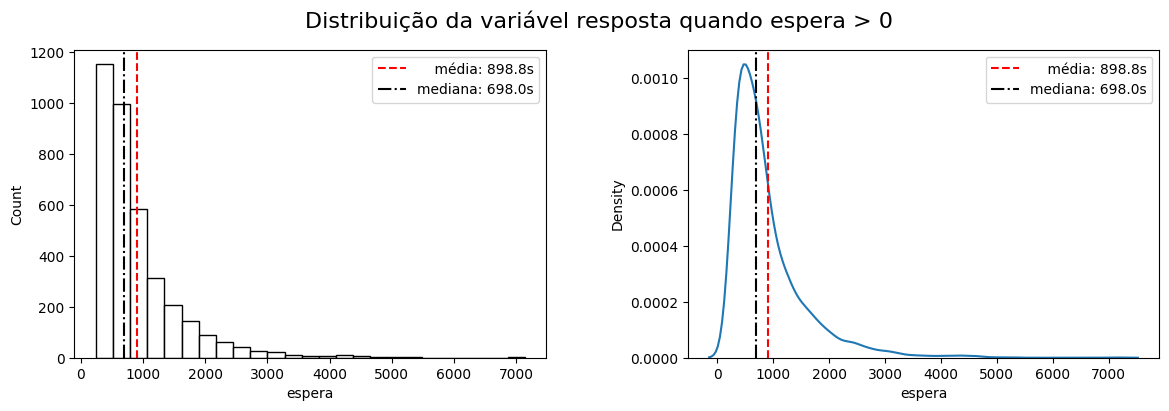

In [12]:
# Probability density of espera when P(espera > 0)
import seaborn as sns

def plot_y_distribution(y_non_zero, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    # plots
    sns.histplot(y_non_zero, color='white', bins=25, ax=ax[0])
    sns.kdeplot(y_non_zero, ax=ax[1])
    
    # legends
    for axis in ax:
        mean, median = y_non_zero.mean(), y_non_zero.median()
        
        mean_l = axis.axvline(mean, color='r', linestyle='--', label="média")
        median_l = axis.axvline(median, color='black', linestyle='-.', label="mediana")
        axis.legend([mean_l, median_l], [f'    média: {mean:.1f}s', f'mediana: {median:.1f}s'])
        # axis.set_xticks(range(0, y_non_zero.astype(int).max(), 500))

    if title:
        fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(wspace=0.3)
    plt.show()

y_non_zero = y[y > 0]
plot_y_distribution(y_non_zero, title='Distribuição da variável resposta quando espera > 0')

In [13]:
y_non_zero.describe()

count    3686.000000
mean      898.751492
std       670.110191
min       241.000000
25%       451.000000
50%       698.000000
75%      1091.000000
max      7137.000000
Name: espera, dtype: float64

In [14]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
embedding_features = ["vector"]
[cat_features.remove(x) for x in embedding_features]
cat_features,embedding_features

(['origem',
  'destino',
  'destino_op_diurna',
  'destino_op_noturna',
  'destino_superficie',
  'destino_designacao_left',
  'destino_designacao_right',
  'metar_station_id',
  'metar_current_wx1',
  'metar_current_wx2',
  'metar_skyc1',
  'metar_skyc2',
  'metar_skyc3',
  'metar_skyc4',
  'metar_remarks',
  'metaf_station_id',
  'metaf_current_wx1',
  'metaf_current_wx3',
  'metaf_skyc1',
  'metaf_skyc2',
  'metaf_skyc3',
  'metaf_skyc4',
  'metaf_remarks',
  'hora_classe'],
 ['vector'])

# Data Imputation

In [15]:
# Fill categorical features with unknown class (a new category)
# numerical features will be filled with min-value catboost default strategy
cat_features_fill_map = {f: "UNKNOWN" for f in cat_features}
X.fillna(cat_features_fill_map, inplace=True)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 65 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   origem                         211679 non-null  object 
 1   destino                        211679 non-null  object 
 2   prev_troca_cabeceira           211679 non-null  int64  
 3   troca_cabeceira_hora_anterior  211679 non-null  int64  
 4   destino_altitude               211679 non-null  int64  
 5   destino_op_diurna              211679 non-null  object 
 6   destino_op_noturna             211679 non-null  object 
 7   destino_comprimento            211679 non-null  int64  
 8   destino_largura                211679 non-null  int64  
 9   destino_superficie             211679 non-null  object 
 10  destino_designacao_left        211679 non-null  object 
 11  destino_designacao_right       211679 n

In [17]:
y.shape

(211679,)

# Data Split Train/Test

In [18]:
from sklearn.model_selection import train_test_split
random_state = 42
X_base_train, X_test, y_base_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
X_train, X_eval, y_train, y_eval = train_test_split(X_base_train, y_base_train, test_size=1/8, random_state=random_state)


# real test -> to submit to kaggle, replace X_test from unlabelled samples and resplit train/eval dataset
# WARNING: in this mode, metrics report and confusion matrix are not reliable, since it trained with all data. So they are not show.

if real_test:
    # TODO: move this data handling to be by default at datasets.get_public_dataset()

    # data handling
    df_real_test = datasets.get_test_dataset()
    back = df_real_test.metaf_current_wx3.copy()
    df_real_test.dropna(axis=1, how="all", inplace=True)
    df_real_test['metaf_current_wx3'] = back
    df_reat_test = features.create_timedelta_features(df_real_test)
    df_real_test.drop(columns=datetime_columns, inplace=True)
    drop_useless_features(df_real_test)
    X_test = df_real_test
    X_test.fillna(cat_features_fill_map, inplace=True)

    # split
    _, X_eval, _, y_eval = train_test_split(X, y, test_size=0.20, random_state=random_state)
    X_eval.info()

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42336 entries, e3363a14bd61af40750f7af41ce1791e to 3f523ec8b1d1b5795269b30eb0772bda
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   origem                         42336 non-null  object 
 1   destino                        42336 non-null  object 
 2   prev_troca_cabeceira           42336 non-null  int64  
 3   troca_cabeceira_hora_anterior  42336 non-null  int64  
 4   destino_altitude               42336 non-null  int64  
 5   destino_op_diurna              42336 non-null  object 
 6   destino_op_noturna             42336 non-null  object 
 7   destino_comprimento            42336 non-null  int64  
 8   destino_largura                42336 non-null  int64  
 9   destino_superficie             42336 non-null  object 
 10  destino_designacao_left        42336 non-null  object 
 11  destino_designacao_right       42336 non-null  object

# Add graph Features

In [19]:
from dsc2024 import features
X_train = features.generate_graph_features(X_train)
X_test = features.graph_features_testdata(X_test, X_train)
X_eval = features.graph_features_testdata(X_eval, X_train)

In [20]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
prev_troca_cabeceira,148175.0,0.315343,0.464654,0.000000,0.000000,0.000000,1.000000,1.000000
troca_cabeceira_hora_anterior,148175.0,0.225504,0.417915,0.000000,0.000000,0.000000,0.000000,1.000000
destino_altitude,148175.0,510.954419,413.305505,3.000000,9.000000,750.000000,829.000000,1066.000000
destino_comprimento,148175.0,2581.410150,916.831118,1260.000000,1940.000000,3007.000000,3240.000000,4000.000000
destino_largura,148175.0,42.871301,5.234435,30.000000,45.000000,45.000000,45.000000,45.000000
metar_latitude,148167.0,-21.575239,5.249459,-30.000000,-23.620000,-23.000000,-19.630000,-8.130000
metar_longitude,148167.0,-45.423260,3.892660,-51.170000,-47.920000,-46.630000,-43.170000,-34.920000
metar_elevation,148167.0,511.587837,413.196205,3.000000,5.000000,750.000000,828.000000,1061.000000
metar_wind_direction,140236.0,158.536538,98.116078,0.000000,90.000000,140.000000,210.000000,360.000000
metar_wind_speed,148163.0,7.032377,3.786399,0.000000,4.000000,7.000000,9.000000,35.000000


# Training model

In [21]:
%%time
from catboost import CatBoostRegressor, Pool

train_mask = y_train > 0
# Criação do Pool com os dados de treinamento
train_data = Pool(
   data=X_train,
   label=y_train,
   cat_features=cat_features,
   embedding_features=embedding_features
)

# Métrica de avaliação
eval_metric = "R2" 
loss_function = "RMSE"
metric = "R2"  # R-quadrado como métrica de perda personalizada

# Configuração e treinamento do modelo CatBoostRegressor
model = CatBoostRegressor(
    iterations=800,  
    early_stopping_rounds=50,  # Número de iterações para aguardar uma melhoria
    eval_metric=eval_metric, # Métrica de avaliação para early stopping
    loss_function=loss_function, 
    cat_features=cat_features,
    embedding_features=embedding_features,
    custom_metric=[metric],  # Métrica personalizada adicional
    verbose=50,  # Exibir informações a cada n iterações
    random_seed=random_state,
    bagging_temperature=10,
    use_best_model=True,
    depth=16 -1,  # Profundidade máxima das árvores
    learning_rate=0.004,
    subsample=0.8,
)

# Treinamento do modelo
eval_mask = y_eval > 0
model.fit(train_data, eval_set=(X_eval, y_eval), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0008295	test: 0.0005258	best: 0.0005258 (0)	total: 4.61s	remaining: 1h 1m 23s
50:	learn: 0.0384619	test: 0.0242427	best: 0.0242427 (50)	total: 4m 2s	remaining: 59m 14s
100:	learn: 0.0698293	test: 0.0419698	best: 0.0419698 (100)	total: 8m 4s	remaining: 55m 55s
150:	learn: 0.0965871	test: 0.0561883	best: 0.0561883 (150)	total: 12m 20s	remaining: 53m 2s
200:	learn: 0.1189165	test: 0.0674903	best: 0.0674903 (200)	total: 16m 53s	remaining: 50m 21s
250:	learn: 0.1371962	test: 0.0760737	best: 0.0760737 (250)	total: 21m 29s	remaining: 47m
300:	learn: 0.1536320	test: 0.0829070	best: 0.0829070 (300)	total: 26m 20s	remaining: 43m 39s
350:	learn: 0.1676956	test: 0.0878470	best: 0.0878470 (350)	total: 30m 48s	remaining: 39m 24s
400:	learn: 0.1814269	test: 0.0933214	best: 0.0933214 (400)	total: 35m 43s	remaining: 35m 32s
450:	learn: 0.1927312	test: 0.0970572	best: 0.0970572 (450)	total: 41m 26s	remaining: 32m 3s
500:	learn: 0.2016489	test: 0.0998418	best: 0.0998418 (500)	total: 45m 23s	r

In [22]:
test_mask = y_test > 0
y_pred = model.predict(X_test[model.feature_names_])
y_pred_series = pd.Series(y_pred, index=X_test.index, name="espera")
y_pred_series

flightid
e3363a14bd61af40750f7af41ce1791e    26.556467
3c3e318735b2058d019fbee234ffc6cb     9.190405
e247f6b137d54a7a1e69e040152f5d3e    35.858301
e10c78204a970b33db73823bdcf6102f     5.682751
0134fe1ea039ddcda0229747edb00ee3     9.051391
                                      ...    
da0a3361a71e50ce1bcb949f0b80e956    25.472100
e5fdb21438133a7b382de5a7da66cac2    31.030844
ea098ada00656210a87a484ef471cb44     6.923309
6235cfd0ed6e95c655d5e9b67034105c    15.896591
3f523ec8b1d1b5795269b30eb0772bda    19.387103
Name: espera, Length: 42336, dtype: float64

# Model evaluation

R2 score:  0.087
RMSE score:  17375.099
Classification Report: F1[class=1] = 0.095
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     41616
           1       0.47      0.05      0.10       720

    accuracy                           0.98     42336
   macro avg       0.73      0.53      0.54     42336
weighted avg       0.98      0.98      0.98     42336

Confusion Matrix:
[[41574    42]
 [  682    38]]


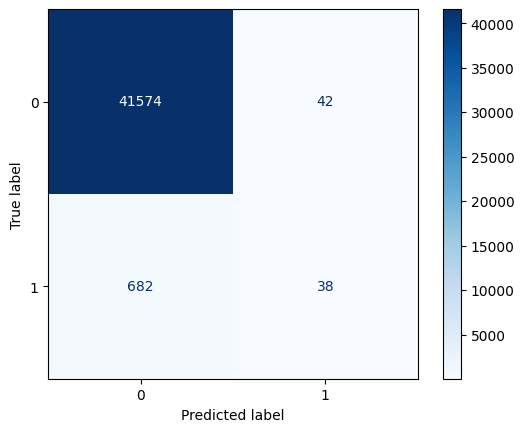

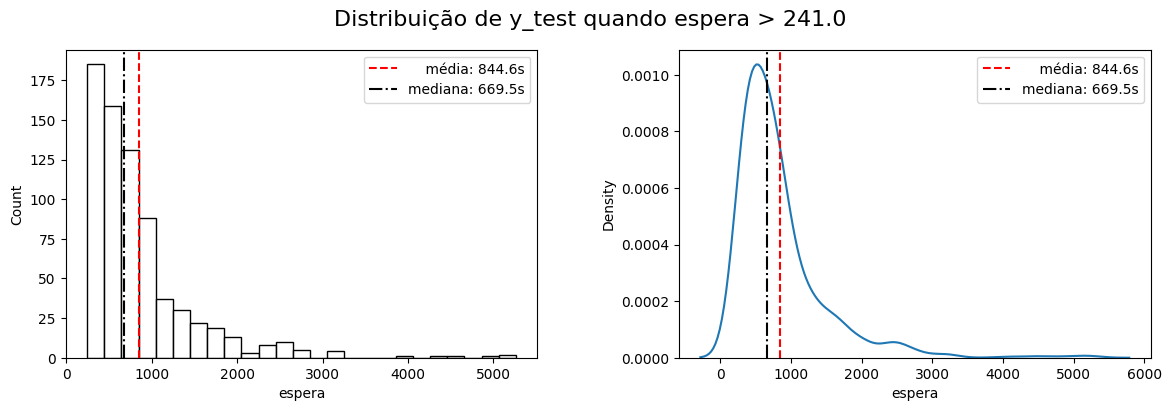

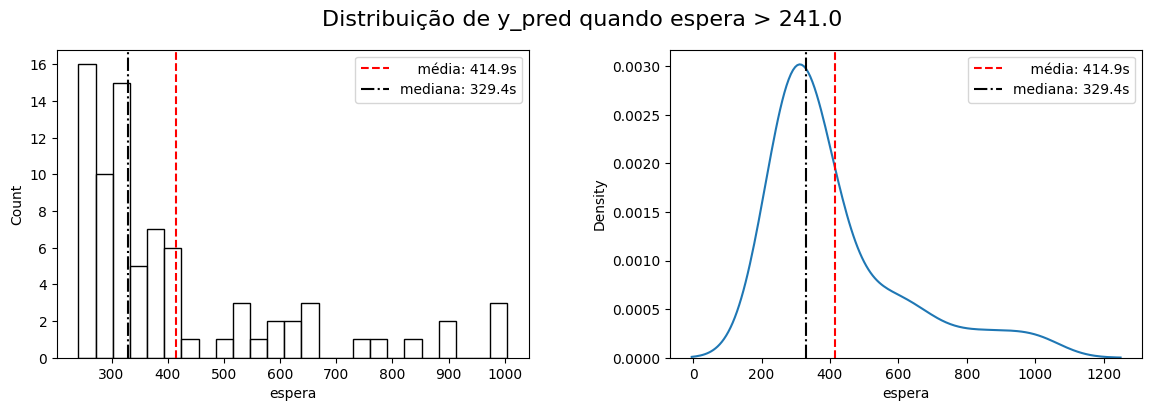

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, r2_score, mean_squared_error

def display_model_evaluation(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    f1_score_class1 = f1_score(y_test, y_pred, average=None)
    print(f"Classification Report: F1[class=1] = {round(f1_score_class1[1], 3)}")
    print(report)
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

def regression_report(y_test, y_pred):
    print("R2 score: ", round(r2_score(y_test, y_pred), ndigits=3))
    print("RMSE score: ", round(mean_squared_error(y_test, y_pred), ndigits=3))

t = y_train[y_train > 0].min()
if not real_test:
    y_test_binarized = (y_test > t).astype(int)
    y_pred_binarized =  (y_pred > t).astype(int)
    regression_report(y_test, y_pred)
    display_model_evaluation(y_test_binarized, y_pred_binarized)
    plot_y_distribution(y_test[y_test > t], title=f'Distribuição de y_test quando espera > {t}')

plot_y_distribution(y_pred_series[y_pred_series > t], title=f'Distribuição de y_pred quando espera > {t}') 

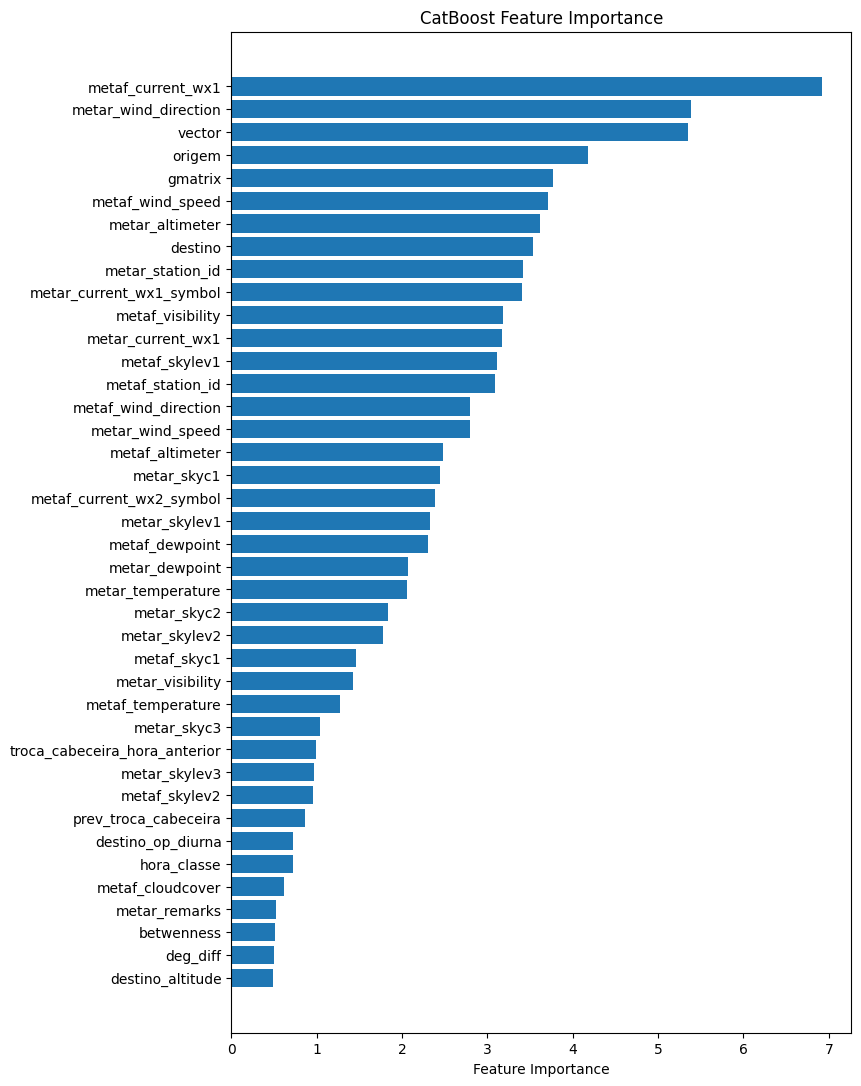

In [24]:
# plot feature importance
feature_importance = model.get_feature_importance(type='FeatureImportance')
feature_names = model.feature_names_
sorted_idx = feature_importance.argsort()[30:]

plt.figure(figsize=(8, 13))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()

# Save prediction


In [25]:
if real_test:
    selected_columns = ["dt_dep", "dt_arr", "origem", "destino", "espera"]
    df_test = datasets.get_test_dataset()
    df_test["espera"] = y_pred_series
    df_test[selected_columns].to_csv(datasets.datasets_dir / "catboost_regression_cropped.csv")
    y_pred_series.count()